In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2 
import os 
from random import shuffle 
from tqdm import tqdm 
from PIL import Image
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import warnings
warnings.filterwarnings('ignore')
import os
# print(os.listdir("../input"))

import pickle

# Any results you write to the current directory are saved as output.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Untitled_folder/cat_and_dog/training_set.zip")
zip_ref.extractall("/content/ext_file_ii")
zip_ref.close()

In [4]:
train_cat = "/content/ext_file_ii/training_set/cats"
train_dog = "/content/ext_file_ii/training_set/dogs"

In [7]:
num = 1
for image in tqdm(os.listdir(train_cat)):
  # image_idx = image[0,-3]
  path = os.path.join(train_cat + "/" + image)
  if path == '/content/ext_file_ii/training_set/cats/.ipynb_checkpoints':
    continue
  elif path == '/content/ext_file_ii/training_set/cats/_DS_Store':
    continue 
  else:
    im1 = Image.open(path)
    im1.save('/content/ext_file_ii/training_set_png/cats/cat'+ str(num) + ".png" )
    num += 1

100%|██████████| 4001/4001 [04:18<00:00, 15.46it/s]


In [8]:

num = 1
for image in tqdm(os.listdir(train_dog)):
  # image_idx = image[0, -3]
  path =os.path.join(train_dog + "/" + image)
  if path == '/content/ext_file_ii/training_set/dogs/.ipynb_checkpoint':
    continue
  elif path == '/content/ext_file_ii/training_set/dogs/_DS_Store':
    continue 
  else:
    im2 = Image.open(path)
    im2.save("/content/ext_file_ii/training_set_png/dogs/dog" + str(num) + ".png")
    num += 1

100%|██████████| 4006/4006 [04:19<00:00, 15.46it/s]


In [9]:
train_cat = "/content/ext_file_ii/training_set_png/cats"
train_dog = "/content/ext_file_ii/training_set_png/dogs"
image_size = 128

In [10]:
data_dir = "/content/ext_file_ii/training_set_png"

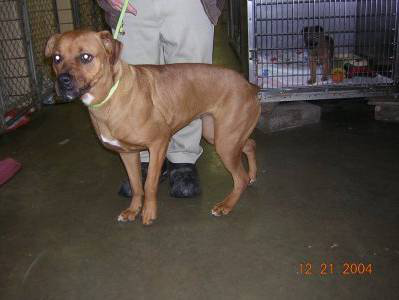

In [11]:
Image.open("/content/ext_file_ii/training_set_png/dogs/dog2.png")

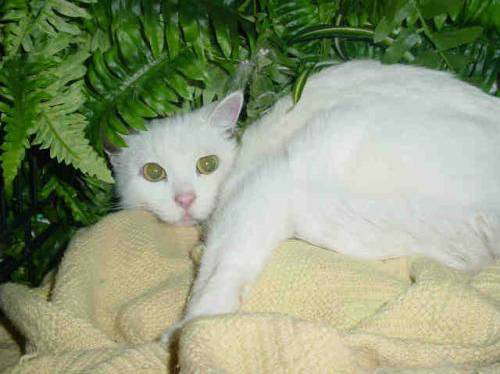

In [12]:
Image.open("/content/ext_file_ii/training_set_png/cats/cat1.png")

In [13]:
CATEGORY = [train_cat, train_dog]

In [14]:
IMG_SIZE = 100
data = []
for category in CATEGORY:
  label = CATEGORY.index(category)
  for img in os.listdir(category):
    path = os.path.join(category, img)
    img_arr = cv2.imread(path)
    img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
    data.append([img_arr, label])


In [15]:
len(data)

8005

In [16]:
shuffle(data)

In [17]:
data[0]

[array([[[156, 143, 145],
         [156, 151, 153],
         [131, 137, 136],
         ...,
         [ 77,  82,  85],
         [ 89,  99,  97],
         [ 75,  79,  77]],
 
        [[157, 149, 150],
         [160, 155, 156],
         [153, 155, 155],
         ...,
         [ 97,  95,  95],
         [131, 122, 119],
         [155, 142, 136]],
 
        [[158, 153, 154],
         [166, 164, 164],
         [159, 159, 159],
         ...,
         [157, 147, 143],
         [169, 150, 143],
         [173, 152, 144]],
 
        ...,
 
        [[ 73,  73,  73],
         [ 74,  74,  74],
         [ 72,  72,  72],
         ...,
         [101, 101, 107],
         [100, 100, 106],
         [118, 118, 124]],
 
        [[ 74,  73,  73],
         [ 78,  77,  77],
         [ 86,  84,  84],
         ...,
         [111, 111, 117],
         [102, 102, 109],
         [103, 103, 109]],
 
        [[ 78,  76,  76],
         [ 80,  78,  78],
         [ 85,  83,  83],
         ...,
         [115, 115, 121],
  

In [18]:
X = []
y = []

for features,labels in data:
  X.append(features)
  y.append(labels)

In [19]:
X = np.asarray(X)
y = np.asarray(y)

In [20]:
len(y)

8005

In [21]:
pickle.dump(X, open("/content/drive/MyDrive/pickled_file/cat&dog/X.pkl", "wb"))
pickle.dump(y, open("/content/drive/MyDrive/pickled_file/cat&dog/y.pkl", "wb"))

In [22]:
X = pickle.load(open("/content/drive/MyDrive/pickled_file/cat&dog/X.pkl", "rb"))
y = pickle.load(open("/content/drive/MyDrive/pickled_file/cat&dog/y.pkl", "rb"))

In [23]:
X = X/255

In [24]:
X.shape

(8005, 100, 100, 3)

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [26]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation = "relu"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = "relu"))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, input_shape = X.shape[1:], activation = "relu"))

model.add(Dense(2, activation = "softmax"))

In [27]:
model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [28]:
model.fit(X, y, epochs=5, validation_split=0.1)

Epoch 1/5
226/226 [==============================] - 168s 738ms/step - loss: 0.6865 - accuracy: 0.5843 - val_loss: 0.6597 - val_accuracy: 0.6005
Epoch 2/5
226/226 [==============================] - 166s 734ms/step - loss: 0.6385 - accuracy: 0.6485 - val_loss: 0.6118 - val_accuracy: 0.6679
Epoch 3/5
226/226 [==============================] - 163s 722ms/step - loss: 0.5542 - accuracy: 0.7159 - val_loss: 0.5752 - val_accuracy: 0.6966
Epoch 4/5
226/226 [==============================] - 163s 720ms/step - loss: 0.4323 - accuracy: 0.7991 - val_loss: 0.6648 - val_accuracy: 0.6729
Epoch 5/5
226/226 [==============================] - 164s 725ms/step - loss: 0.2900 - accuracy: 0.8723 - val_loss: 0.6733 - val_accuracy: 0.7091


In [29]:
import keras
nn_model = Sequential()

nn_model.add(keras.Input(shape=X.shape[1:]))
nn_model.add(Flatten())
nn_model.add(Dense(128, activation = "relu"))
nn_model.add(Dense(128, activation = "relu"))
nn_model.add(Dense(128, activation = "relu"))
nn_model.add(Dense(2, activation = "softmax"))


In [30]:
nn_model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [31]:
nn_model.fit(X, y, epochs=5, validation_split = 0.1)

Epoch 1/5
226/226 [==============================] - 9s 40ms/step - loss: 0.8959 - accuracy: 0.5287 - val_loss: 0.7999 - val_accuracy: 0.5144
Epoch 2/5
226/226 [==============================] - 7s 32ms/step - loss: 0.7119 - accuracy: 0.5459 - val_loss: 0.6727 - val_accuracy: 0.5843
Epoch 3/5
226/226 [==============================] - 7s 31ms/step - loss: 0.6957 - accuracy: 0.5346 - val_loss: 0.6872 - val_accuracy: 0.5793
Epoch 4/5
226/226 [==============================] - 7s 30ms/step - loss: 0.6913 - accuracy: 0.5103 - val_loss: 0.6927 - val_accuracy: 0.5156
Epoch 5/5
226/226 [==============================] - 7s 30ms/step - loss: 0.6891 - accuracy: 0.5293 - val_loss: 0.6878 - val_accuracy: 0.5406


Transfer Learning

In [32]:
from keras.models import Sequential
# from scipy.misc import imread
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.layers import Dense
import pandas as pd

from keras.applications.vgg16 import decode_predictions
from keras import layers
from keras import Model
from tensorflow .keras .applications.vgg16 import VGG16


In [33]:
data

[[array([[[156, 143, 145],
          [156, 151, 153],
          [131, 137, 136],
          ...,
          [ 77,  82,  85],
          [ 89,  99,  97],
          [ 75,  79,  77]],
  
         [[157, 149, 150],
          [160, 155, 156],
          [153, 155, 155],
          ...,
          [ 97,  95,  95],
          [131, 122, 119],
          [155, 142, 136]],
  
         [[158, 153, 154],
          [166, 164, 164],
          [159, 159, 159],
          ...,
          [157, 147, 143],
          [169, 150, 143],
          [173, 152, 144]],
  
         ...,
  
         [[ 73,  73,  73],
          [ 74,  74,  74],
          [ 72,  72,  72],
          ...,
          [101, 101, 107],
          [100, 100, 106],
          [118, 118, 124]],
  
         [[ 74,  73,  73],
          [ 78,  77,  77],
          [ 86,  84,  84],
          ...,
          [111, 111, 117],
          [102, 102, 109],
          [103, 103, 109]],
  
         [[ 78,  76,  76],
          [ 80,  78,  78],
          [ 85,  83,  83

In [35]:
os.listdir(data_dir)

['cats', '.ipynb_checkpoints', 'dogs']

In [36]:
#preprocessing
from keras.preprocessing.image import ImageDataGenerator
train_augmentation = ImageDataGenerator(
    rescale =1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

In [37]:
# Creating batches of size 128 with target size 128 by 128 from training folder
train_generator = train_augmentation.flow_from_directory(
    directory="/content/ext_file_ii/training_set",
    target_size=(128, 128),
    batch_size= 128,
    class_mode="binary"
) 

Found 8005 images belonging to 2 classes.


In [38]:
# Getting pretrained model with imagenet weight by skipping top
conv_base = VGG16(input_shape=(128,128,3), include_top=False, weights='imagenet')

58900480/58889256 [==============================] - 0s 0us/step


In [39]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [40]:
## Feature extraction method


# Freeze the conv base
for layer in conv_base.layers:
  layer.trainable = False

In [41]:
# Create model with conv base
model = Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               2097408   
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [43]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=["accuracy"])

In [44]:
hitory = model.fit(train_generator,
                   steps_per_epoch=8,
                   epochs=5,
                   verbose=1)

Epoch 1/5
8/8 [==============================] - 180s 22s/step - loss: 2.6744 - accuracy: 0.5137
Epoch 2/5
8/8 [==============================] - 181s 23s/step - loss: 0.6234 - accuracy: 0.6670
Epoch 3/5
8/8 [==============================] - 168s 21s/step - loss: 0.5576 - accuracy: 0.6881
Epoch 4/5
8/8 [==============================] - 178s 22s/step - loss: 0.5933 - accuracy: 0.6826
Epoch 5/5
8/8 [==============================] - 182s 23s/step - loss: 0.4976 - accuracy: 0.7471


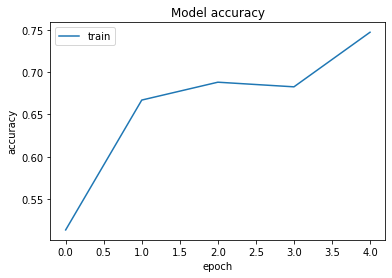

In [45]:
# plotting accuracy and loss for train data

plt.plot(hitory.history["accuracy"])
# plt.plot(hitory.history["val_accuracy"])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

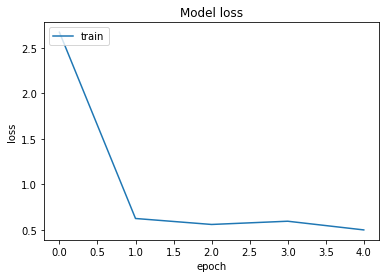

In [46]:
plt.plot(hitory.history["loss"])
# plt.plot(hitory.history["val_accuracy"])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [47]:
## Fine tuning method

fine_tuned = VGG16(input_shape=(128,128,3), include_top=False, weights='imagenet')


In [48]:
fine_tuned.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [49]:
model = Sequential()
model.add(fine_tuned)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [50]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_8 (Dense)             (None, 256)               2097408   
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [51]:
fine_tuned.trainable = True
set_trainable = False
for layer in fine_tuned.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [52]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [54]:
history = model.fit(train_generator,
                steps_per_epoch = 8,
                epochs=5,
                verbose=1)

Epoch 1/5
8/8 [==============================] - 230s 27s/step - loss: 0.7030 - accuracy: 0.5508
Epoch 2/5
8/8 [==============================] - 221s 27s/step - loss: 0.6927 - accuracy: 0.5293
Epoch 3/5
8/8 [==============================] - 217s 27s/step - loss: 0.6958 - accuracy: 0.5098
Epoch 4/5
8/8 [==============================] - 219s 27s/step - loss: 0.6898 - accuracy: 0.4873
Epoch 5/5
8/8 [==============================] - 220s 27s/step - loss: 0.6961 - accuracy: 0.5107


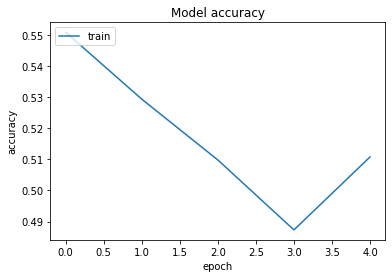

In [55]:
plt.plot(history.history["accuracy"])
# plt.plot(hitory.history["val_accuracy"])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

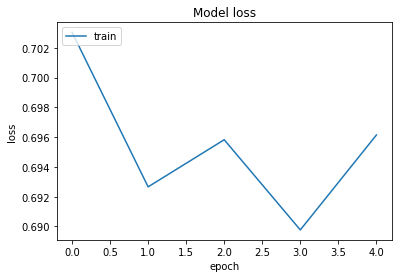

In [56]:
plt.plot(history.history["loss"])
# plt.plot(hitory.history["val_accuracy"])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()